In [ ]:
# Project Details: 
    
#Perform linear regression analysis to identify the relationships between 
    #the dependent and independent variables.

#Determine the coefficient of determination (R-squared) to 
    #measure the model's explanatory power.

#Interpret the coefficients and p-values to assess the 
    #significance and direction of relationships.


#Resources
# sns help -> https://seaborn.pydata.org/tutorial/regression.html 
# lin reg help -> https://www.machinelearningnuggets.com/python-linear-regression/ 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [93]:
membership_df = pd.read_csv("datasets\Copy of Membership_Updated.csv")

age_df = membership_df["Age"]
total_donation_df = membership_df['Total Donation Amount']
gender_df = membership_df["Gender"].loc[membership_df["Gender"] != 'Unknown']
marital_df = membership_df["Gender"].loc[membership_df["Gender"] != 'Unknown']


age_donation_df = pd.concat([age_df, total_donation_df], axis=1)
gender_breakdown_df = pd.concat([age_donation_df, gender_df], axis=1)

#most of the money given is under 10,000, therefore the set of a cap 
moneycap_filter10_df = age_donation_df.loc[age_donation_df['Total Donation Amount'] < 10000]
#gendered
g_moneycap_filter10_df = gender_breakdown_df.loc[gender_breakdown_df['Total Donation Amount'] < 10000]
g_moneycap_filter1_df = gender_breakdown_df.loc[gender_breakdown_df['Total Donation Amount'] < 100]



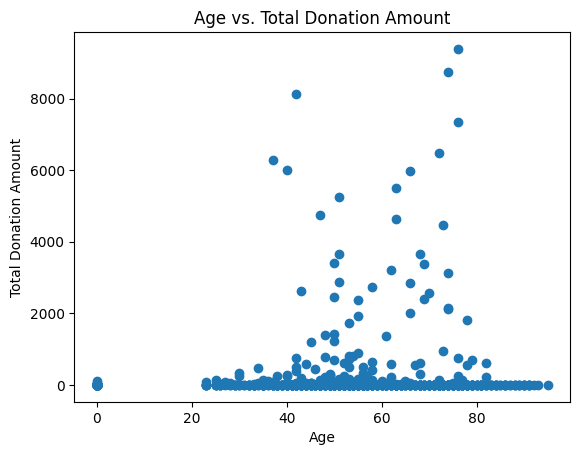

In [46]:
plt.scatter(moneycap_filter10_df['Age'], moneycap_filter10_df['Total Donation Amount'])
plt.title('Age vs. Total Donation Amount')
plt.xlabel("Age")
plt.ylabel("Total Donation Amount")
plt.show()

C:\Users\Miranda\AppData\Local\Temp\ipykernel_8008\4140800659.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns. heatmap(membership_df.corr(), annot=True)


<AxesSubplot: >

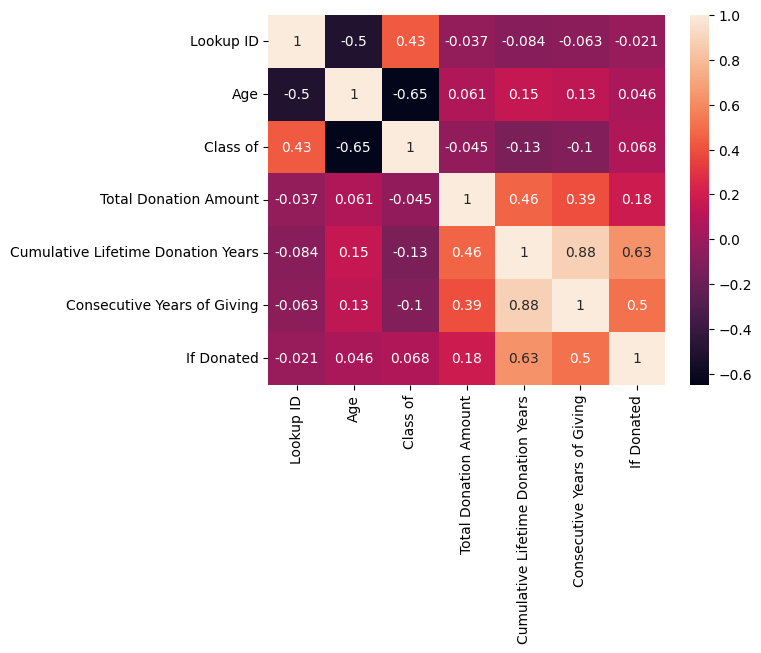

In [22]:
import seaborn as sns 

sns. heatmap(membership_df.corr(), annot=True)

In [139]:
from sklearn import model_selection, linear_model

xval = model_selection.KFold(10, shuffle=True)

model = linear_model.LinearRegression() 
feature = ['Age']
#X = moneycap_filter10_df[feature]
#y = moneycap_filter10_df

results1 = model_selection.cross_validate(model, X,y, cv=xval, scoring='r2', return_train_score =True)

train_r2 = results1['train_score'].mean() 
train_std = results1['train_score'].std() 
test_r2 = results1['test_score'].mean()
test_std = results1['test_score'].std()

print('train_r2 mean:', train_r2)
print('train_std', train_std)
print('test_r2', test_r2)
print('test_std',test_std)

train_r2 mean: 0.5040333156585651
train_std 0.0005917847005721442
test_r2 0.486866203957648
test_std 0.040809907454765156


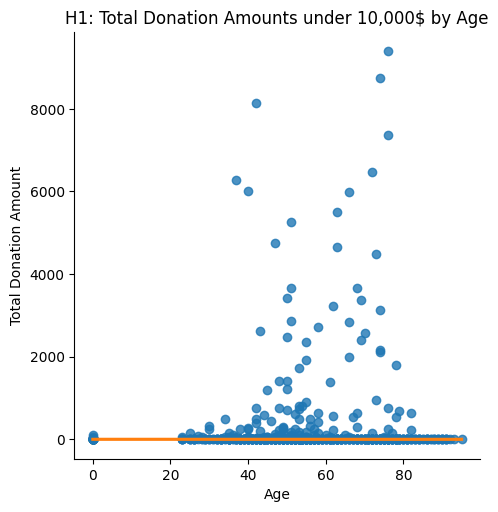

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
results = model_selection.cross_validate(regressor, X,y, cv=xval, scoring='r2', return_train_score =True)

sns.lmplot(x='Age', y='Total Donation Amount', data=moneycap_filter10_df, lowess=True, line_kws={'color': "C1"}).set(title='H1: Total Donation Amounts under 10,000$ by Age')


ValueError: Per-column arrays must each be 1-dimensional

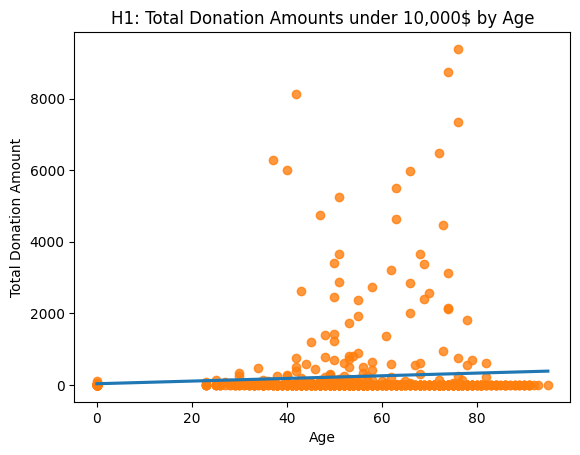

In [153]:
X = moneycap_filter10_df['Age'].to_numpy()
y = moneycap_filter10_df.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train)

sns.regplot(x='Age', y='Total Donation Amount', data=moneycap_filter10_df, ci=None, scatter_kws={'color': "C1"}).set(title='H1: Total Donation Amounts under 10,000$ by Age')

y_pred = regressor.predict(X_test.reshape(-1,1))
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

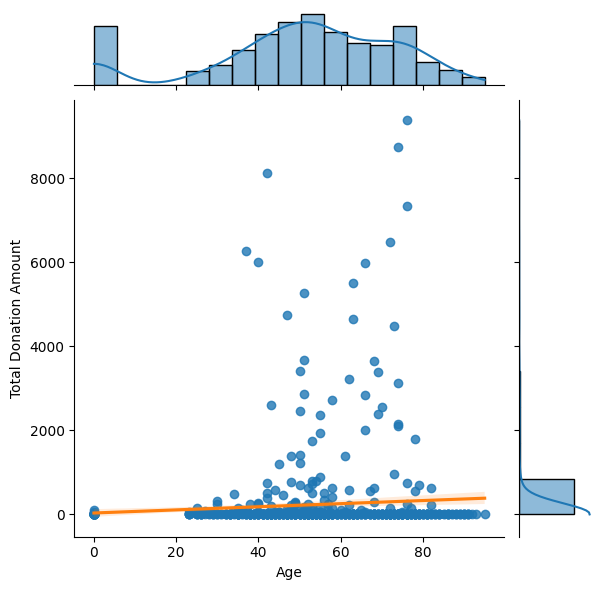

In [97]:
sns.jointplot(x='Age', y='Total Donation Amount', data=moneycap_filter10_df, line_kws={'color': "C1"},kind="reg")

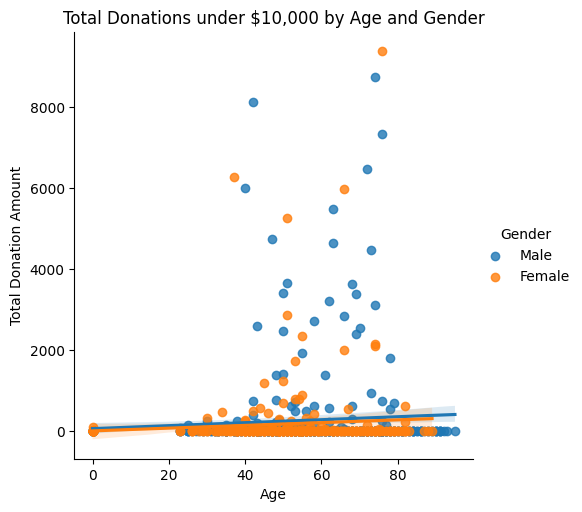

In [86]:
#H2: Males donate more than females 

sns.lmplot(x='Age', y='Total Donation Amount', hue="Gender", data=g_moneycap_filter10_df).set(title='Total Donations under $10,000 by Age and Gender')

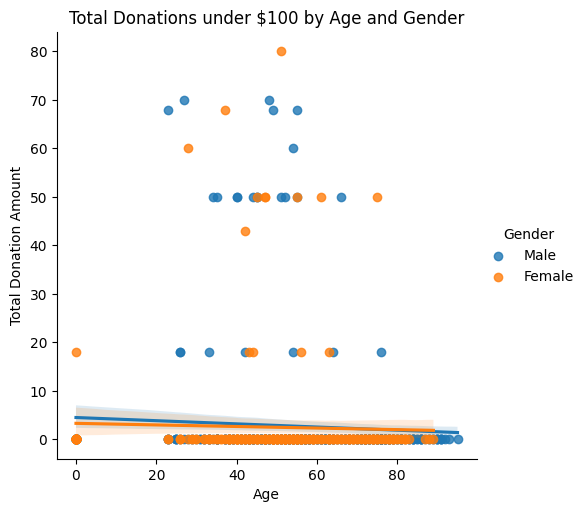

In [95]:

sns.lmplot(x='Age', y='Total Donation Amount', hue="Gender", data=g_moneycap_filter1_df).set(title='Total Donations under $100 by Age and Gender')

In [ ]:
#H3: Married individuals donate more than single individuals


In [ ]:
#H4: Individuals who graduated from GIES donated more than individuals from other colleges 